# Tree-based (Ensemble) Models and Handling Imbalanced Data

For this problem, we will use the wine quality dataset on which the task is a binary classification of whether a given wine is of low or high quality based on different physicochemical features.

The dataset consists of a set of physicochemical features as inputs and the target is wine quality stored in the target column, where a value of 1 corresponds to an instance of high quality wine and -1 corresponds to an instance of low quality ones.

### Loading the data
Load the data from library.

In [ ]:

!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.4 MB/s eta 0:00:00


In [ ]:
# Use wine dataset from imlearn
from imblearn.datasets import fetch_datasets
import numpy as np
import pandas as pd

datasets = fetch_datasets()

# Wine quality dataset contains 12 features, descriptions found here:
# https://archive.ics.uci.edu/ml/datasets/wine+quality
data = datasets['wine_quality']

X, y = data.data, data.target

# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

 A class distribution that is heavily skewed towards one class could lead to a model that is biased towards predicting the majority class, resulting in poor performance on the minority class. This imbalance can affect the model's ability to generalize well to unseen data, especially for the under-represented class.</p>

Percentage of high quality observations Ellipsis


<ipython-input-5-62ae0b921583>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=colors)


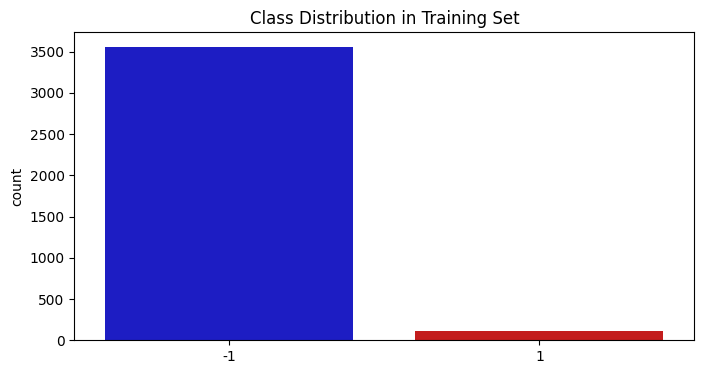

In [ ]:
# import libraries for plotting class distribution
import matplotlib.pyplot as plt
import seaborn as sns

high_quality_ratio = ...
print('Percentage of high quality observations', high_quality_ratio)

# color coding for 2 classes
colors = ["#0101DF", "#DF0101"]

# Draw the class distribution of the dataset
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette=colors)
plt.title('Class Distribution in Training Set')
plt.show()

### Training and testing a Random Forest classfier directly on the data

Let's first train a random forest classifier with default parameters using X_train and y_train and test the performance on the test data.

In [ ]:
# Training and testing a Random Forest classifier directly on the data (3pts)
from sklearn.ensemble import RandomForestClassifier  # class for random forest classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Instantiate and fit a random forest classifier to the training data
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

## Measure and print out the accuracy and recall
y_pred = rf_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print('Random forest classifier accuracy:', test_acc)

test_recall = recall_score(y_test, y_pred, pos_label = 1)

print('Random forest classifier recall:', test_recall)

Random forest classifier accuracy: 0.9526530612244898
Random forest classifier recall: 0.13636363636363635


 While the accuracy is really good, it is not that great on recall indicating an overfit and not really generalised model. This might be due to the bias skew in the data.

### Data balancing via Smote

In [ ]:
from imblearn.over_sampling import SMOTE #Over sampling
import numpy as np

## Instantiate smote and balance training data only
sm = SMOTE(random_state=0)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
high_quality_ratio_bal = np.mean(y_train_bal == 1)

## Compute and print percentage of high quality wine after balancing
print('Percentage of high quality counts in the balanced data:{}%'.format(high_quality_ratio_bal))

Percentage of high quality counts in the balanced data:0.5%


**Question:** Plot the distribution of balanced training data.

<ipython-input-10-21e3f4df8287>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_bal, palette=colors)


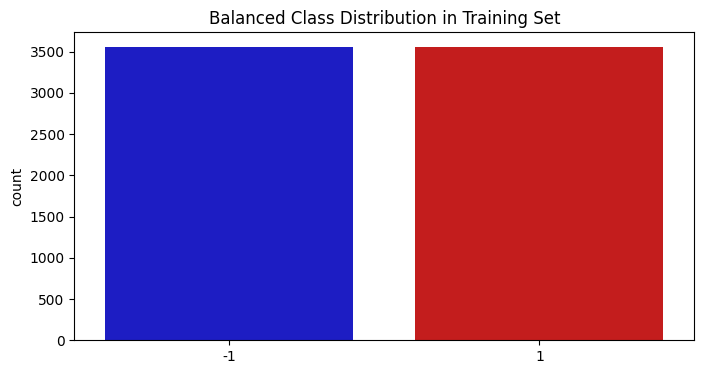

In [ ]:
colors = ["#0101DF", "#DF0101"]
## plot the class distribution of training data after balanced
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_bal, palette=colors)
plt.title('Balanced Class Distribution in Training Set')
plt.show()

Let's retrain and test our random forest model on the balanced training data

In [ ]:
## Instantiate random forest and train on balanced training data
rf_clf_smote = RandomForestClassifier()
rf_clf_smote.fit(X_train_bal, y_train_bal)

y_pred = rf_clf_smote.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print('Random forest classifier accuracy:', test_acc)

test_recall = recall_score(y_test, y_pred)

print('Random forest classifier recall:', test_recall)


Random forest classifier accuracy: 0.9444897959183673
Random forest classifier recall: 0.3333333333333333


This suggests that while the model is generally accurate, its ability to correctly identify all positive samples (high-quality wines, in this case) may still be limited, as indicated by the recall score.

### Control complexity of the model

#### Control the depth of decision trees in our ensemble
By default, the decision trees in random forest are expanded until all leaves are pure or until all leaves contain less than a certain number set by min_samples_split parameter. Let's try a fixed maximum depth that the tree can expand.

In [ ]:
## Instantiate model with max depth trees being 3
rf_clf_depth = RandomForestClassifier(max_depth=3)
rf_clf_depth.fit(X_train_bal, y_train_bal)
y_pred_depth = rf_clf_depth.predict(X_test)

test_acc_depth = accuracy_score(y_test, y_pred_depth)
test_recall_depth = recall_score(y_test, y_pred_depth, pos_label=1)

print('Random forest classifier accuracy:', test_acc_depth)

test_recall = recall_score(y_test, y_pred)

print('Random forest classifier recall:', test_recall_depth)

Random forest classifier accuracy: 0.8326530612244898
Random forest classifier recall: 0.5303030303030303


**Question:** Compute the recall and accuracy scores of the new random forest classifier. How do the accuracy and recall change compared to those in the default parameter case?
<p><b>Answer:</b> While the accuracy did take a hit, the recall increased tremendously, making the model more generalised.

#### Choose the number of trees in the forest
By default, we use 10 random trees. Let's increase this number to 100

In [ ]:
# Control the number of trees in the forest
rf_clf_trees = RandomForestClassifier(max_depth=3, n_estimators=100)
rf_clf_trees.fit(X_train_bal, y_train_bal)
y_pred_trees = rf_clf_trees.predict(X_test)

test_acc_trees = accuracy_score(y_test, y_pred_trees)
print('Random forest classifier accuracy:', test_acc_trees)

test_recall_trees = recall_score(y_test, y_pred_trees, pos_label=1)
print('Random forest classifier recall:', test_recall_trees)


Random forest classifier accuracy: 0.8318367346938775
Random forest classifier recall: 0.5303030303030303


**Question:** Compute the recall and accuracy scores of the random forest classifier. How do the accuracy and recall change compared to those with 10 trees? What do the results imply about increasing the number of trees?
<p><b>Answer:</b>Changing classifier parameters without further balancing adjustments maintained the accuracy (about 83.18%) and recall (53.03%) scores at similar levels to the previous balanced case. This suggests that the parameter adjustments made did not significantly impact the model's ability to generalize better or differently to the balanced dataset.

#### Tree pruning by min_impurity_decrease
By default, the tree keeps expanding until the impurity is 0. However, we can specify a minimum impurity decrease amount under which nodes in the tree stop branching. RandomForestClassifier in sklearn use min_impurity_decrease for setting this threshold. Let's try that on our problem.

In [ ]:
## Instantiate model with min impurity decrease of 0.001
rf_clf_prune = RandomForestClassifier(max_depth=3, n_estimators=100, min_impurity_decrease=0.001)
rf_clf_prune.fit(X_train_bal, y_train_bal)
y_pred_prune = rf_clf_prune.predict(X_test)

test_acc_prune = accuracy_score(y_test, y_pred_prune)

print('Random forest classifier accuracy:', test_acc_prune)

test_recall_prune = recall_score(y_test, y_pred_prune, pos_label=1)

print('Random forest classifier recall:', test_recall_prune)

Random forest classifier accuracy: 0.8285714285714286
Random forest classifier recall: 0.5757575757575758


Adjusting the number of trees in the random forest to a different configuration resulted in a slight decrease in accuracy (to about 82.86%) but an improvement in recall (to about 57.58%). This implies that increasing the number of trees may help the model better capture the minority class, improving its sensitivity to positive samples at a slight cost to overall accuracy.